# Asset Class Returns
### The table below contains the annual asset class returns computed from the monthly returns. The annual returns for 2022 are based on monthly returns from January to April.

#### Source: [Portfolio Visualizer](https://www.portfoliovisualizer.com/historical-asset-class-returns)

In [1]:
import os
import requests
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen, Request
import pandas as pd
from datetime import datetime
import matplotlib
%matplotlib inline

In [2]:
# Setup a scraper for Asset Class Returns table
url = ("https://www.portfoliovisualizer.com/historical-asset-class-returns")
print(url)
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
html = soup(webpage, "html.parser")

https://www.portfoliovisualizer.com/historical-asset-class-returns


In [3]:
# Obtain data from the Asset Class Returns table (drop last comment row), set Year as datetime, convert values to float
asset_class_returns = pd.read_html(str(html), attrs = {'class':'table table-striped table-condensed stickyHeaders'})[0]
asset_class_returns = pd.DataFrame(asset_class_returns).drop(asset_class_returns.index[-1])
asset_class_returns['Year'] = asset_class_returns['Year'].astype('string')
asset_class_returns['Year'] = pd.to_datetime(asset_class_returns['Year']).dt.year
asset_class_returns = asset_class_returns.set_index('Year')
asset_class_returns =  asset_class_returns.replace('%','', regex=True).astype('float')
asset_class_returns = asset_class_returns / 100
asset_class_returns.to_csv('resources/asset_class_returns.csv')
asset_class_returns

,Inflation,US Stock Market,US Large Cap,US Large Cap Value,US Large Cap Growth,US Mid Cap,US Mid Cap Value,US Mid Cap Growth,US Small Cap,US Small Cap Value,...,Corporate Bonds,Long-Term Corporate Bonds,High Yield Corporate Bonds,Short-Term Tax-Exempt,Intermediate-Term Tax-Exempt,Long-Term Tax-Exempt,REIT,Gold,Precious Metals,Commodities
Year,,,,,,,,,,,,,,,,,,,,,
1972,0.0341,0.1762,0.1895,0.1532,0.2297,0.0802,0.1194,0.0429,0.0866,0.1115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4902,NaN,NaN
1973,0.0871,-0.1818,-0.1618,-0.0979,-0.2309,-0.2420,-0.1377,-0.3296,-0.3285,-0.2412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7296,NaN,NaN
1974,0.1234,-0.2781,-0.2693,-0.2113,-0.3234,-0.2634,-0.1980,-0.3264,-0.2759,-0.2109,...,NaN,-0.0227,NaN,NaN,NaN,NaN,NaN,0.6615,NaN,NaN
1975,0.0694,0.3782,0.3695,0.4067,0.3310,0.4869,0.5679,0.4195,0.5513,0.5394,...,NaN,0.0995,NaN,NaN,NaN,NaN,NaN,-0.2480,NaN,NaN
1976,0.0486,0.2647,0.2418,0.3332,0.1485,0.3667,0.4679,0.2654,0.4533,0.5478,...,NaN,0.1535,NaN,NaN,NaN,NaN,NaN,-0.0410,NaN,NaN
1977,0.0670,-0.0336,-0.0784,-0.0331,-0.0866,0.0130,0.0524,-0.0212,0.1567,0.1588,...,NaN,0.0498,NaN,NaN,NaN,NaN,NaN,0.2264,NaN,NaN
1978,0.0902,0.0845,0.0587,0.0637,0.0711,0.0897,0.0905,0.0880,0.1774,0.1925,...,NaN,0.0205,NaN,0.0231,-0.0465,0.0593,NaN,0.3701,NaN,NaN
1979,0.1329,0.2425,0.1805,0.2322,0.1744,0.3148,0.2984,0.3307,0.4102,0.3780,...,NaN,-0.0077,0.0557,0.0478,-0.0158,-0.0297,NaN,1.2655,NaN,NaN
1980,0.1252,0.3315,0.3192,0.3175,0.3559,0.3076,0.1760,0.4525,0.3578,0.2577,...,NaN,0.0466,0.0316,0.0530,-0.1035,-0.1600,NaN,0.1519,NaN,NaN


In [4]:
# Display keys 
asset_class_returns.keys()

Index(['Inflation', 'US Stock Market', 'US Large Cap', 'US Large Cap Value',
       'US Large Cap Growth', 'US Mid Cap', 'US Mid Cap Value',
       'US Mid Cap Growth', 'US Small Cap', 'US Small Cap Value',
       'US Small Cap Growth', 'US Micro Cap', 'Global ex-US Stock Market',
       'Intl Developed ex-US Market', 'International ex-US Small Cap',
       'International ex-US Value', 'European Stocks', 'Pacific Stocks',
       'Emerging Markets', 'Cash', 'Short Term Treasury',
       'Intermediate Term Treasury', '10-year Treasury', 'Long Term Treasury',
       'Total US Bond Market', 'TIPS', 'Global Bonds (Unhedged)',
       'Global Bonds (USD Hedged)', 'Short-Term Investment Grade',
       'Corporate Bonds', 'Long-Term Corporate Bonds',
       'High Yield Corporate Bonds', 'Short-Term Tax-Exempt',
       'Intermediate-Term Tax-Exempt', 'Long-Term Tax-Exempt', 'REIT', 'Gold',
       'Precious Metals', 'Commodities'],
      dtype='object')

<AxesSubplot:title={'center':'Cumulative Equity Returns'}, xlabel='Year'>

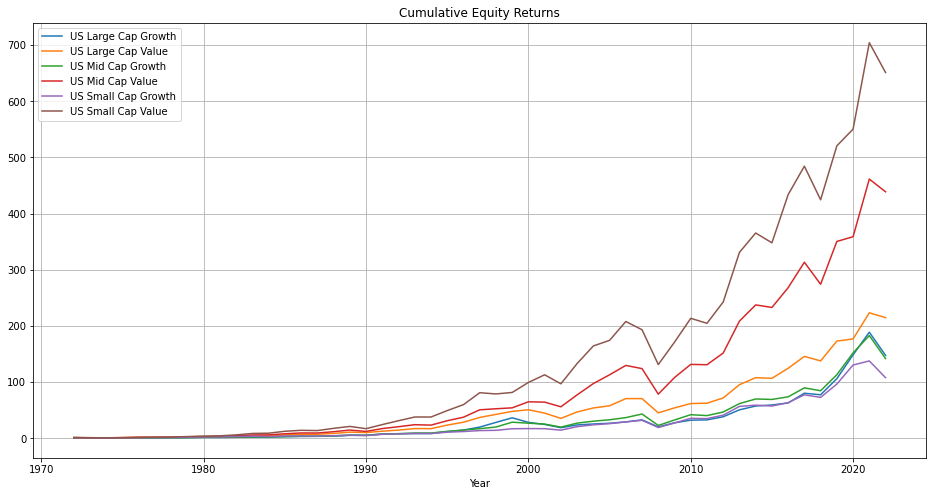

In [28]:
# Calculate cumulative returns
cum_ret = (1+asset_class_returns).cumprod(axis=0)
cum_ret[['US Large Cap Growth','US Large Cap Value','US Mid Cap Growth','US Mid Cap Value','US Small Cap Growth','US Small Cap Value']].plot(figsize=(16,8), title='Cumulative Equity Returns', grid=True)